In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup=pd.read_csv("50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Correlation matrix

In [5]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


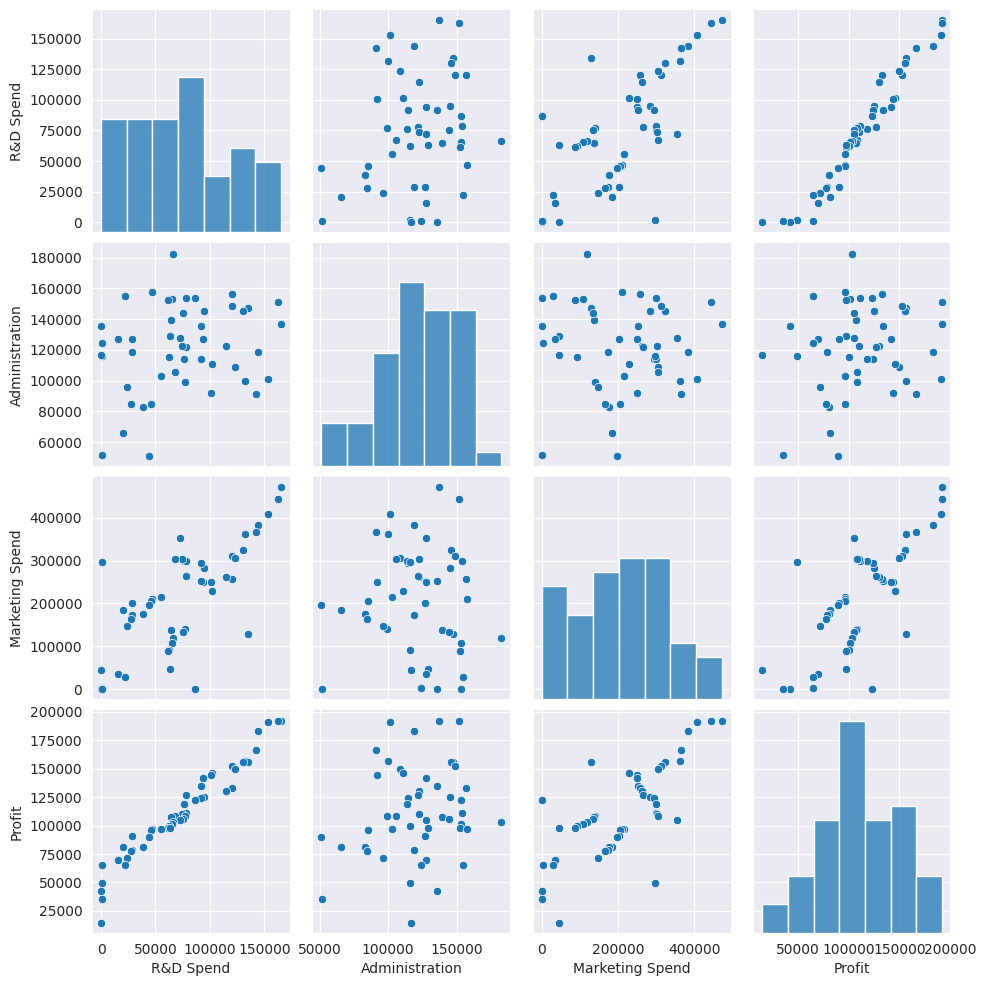

In [6]:
sn.set_style(style='darkgrid')
sn.pairplot(startup)

In [7]:
startup=startup.rename({'R&D Spend':'RDS', 'Administration':'Admin', 'Marketing Spend':'MKTS'}, axis = 1)
startup

,RDS,Admin,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
model=smf.ols('Profit~RDS+Admin+MKTS',data=startup).fit()

In [9]:
model.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MKTS             0.027228
dtype: float64

In [10]:
#t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
MKTS          1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
MKTS         1.047168e-01
dtype: float64


In [11]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

Simple Linear Regression Model

In [12]:
slr_a=smf.ols("Profit~Admin",data=startup).fit()
slr_a.tvalues,slr_a.pvalues

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.003824
 Admin        0.162217
 dtype: float64)

In [13]:
slr_m=smf.ols("Profit~MKTS",data=startup).fit()
slr_m.tvalues,slr_m.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [14]:
mlr_am=smf.ols('Profit~Admin+MKTS',data = startup).fit()  
print(mlr_am.tvalues, '\n', mlr_am.pvalues)

Intercept    1.142741
Admin        2.467779
MKTS         8.281039
dtype: float64 
 Intercept    2.589341e-01
Admin        1.729198e-02
MKTS         9.727245e-11
dtype: float64


Model Validation

In [15]:
# VIF
rsq_r = smf.ols('RDS~Admin+MKTS',data=startup).fit().rsquared  
vif_r = 1/(1-rsq_r) 

rsq_a = smf.ols('Admin~RDS+MKTS',data=startup).fit().rsquared  
vif_a = 1/(1-rsq_a) 

rsq_m = smf.ols('MKTS~RDS+Admin',data=startup).fit().rsquared  
vif_m = 1/(1-rsq_m) 

# Storing vif values in a data frame
d1 = {'Variables':['RDS','Admin','MKTS'],'VIF':[vif_r,vif_a,vif_m]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,Admin,1.175091
2,MKTS,2.326773


In [16]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

Residual Analysis

Test For Normality Of Residuals(Q-Q plot)

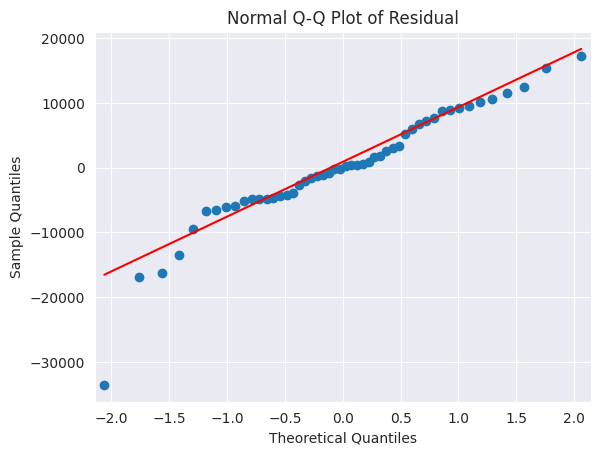

In [17]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q Plot of Residual")
plt.show()

In [18]:
list(np.where(model.resid<-30000))

[array([49])]

In [19]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

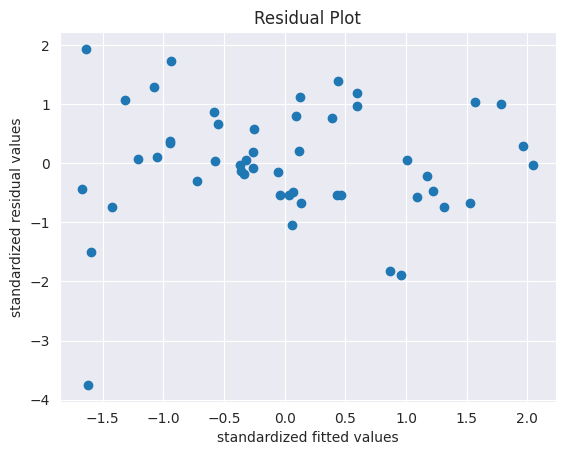

In [20]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

eval_env: 1


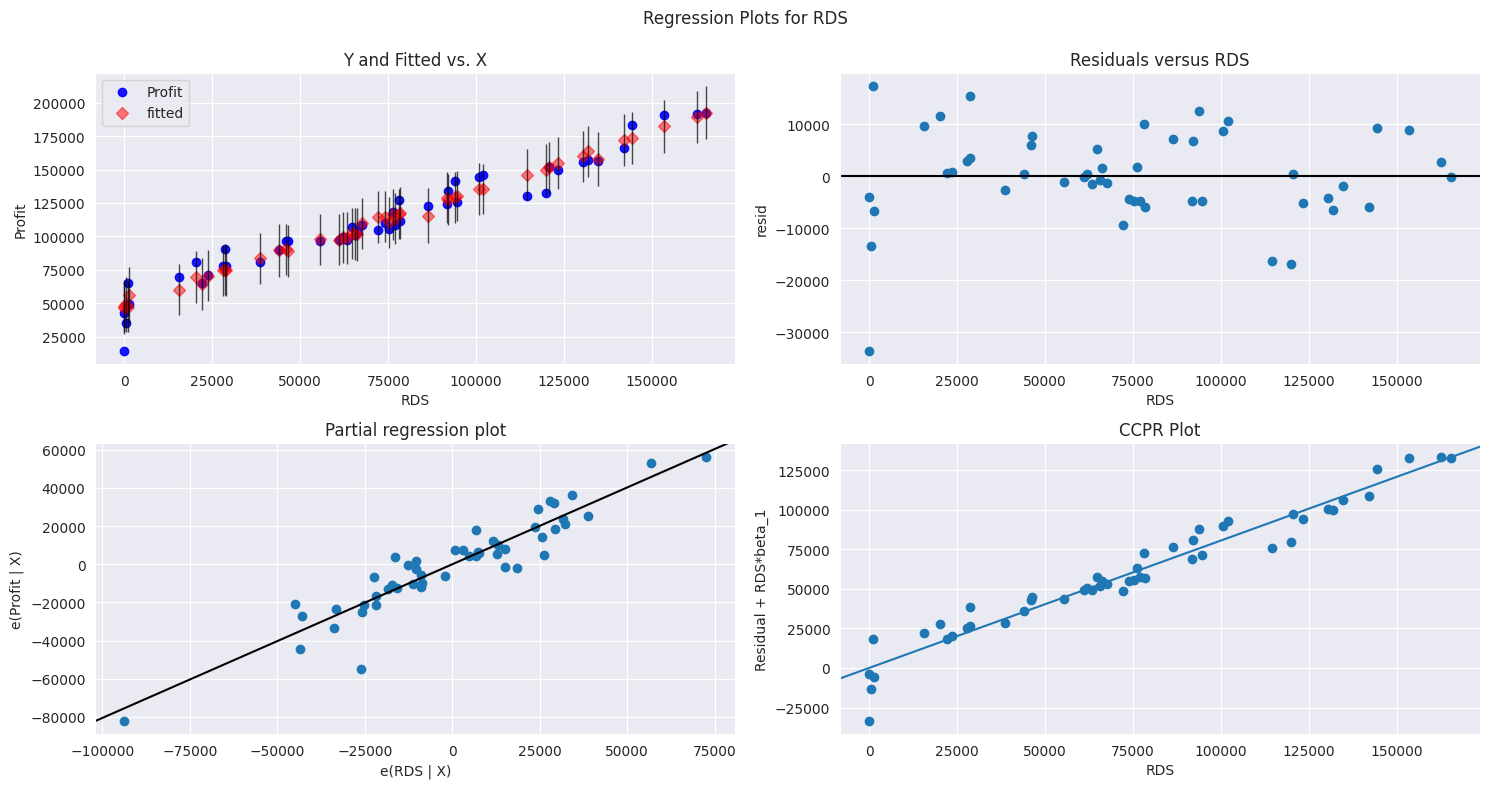

In [21]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


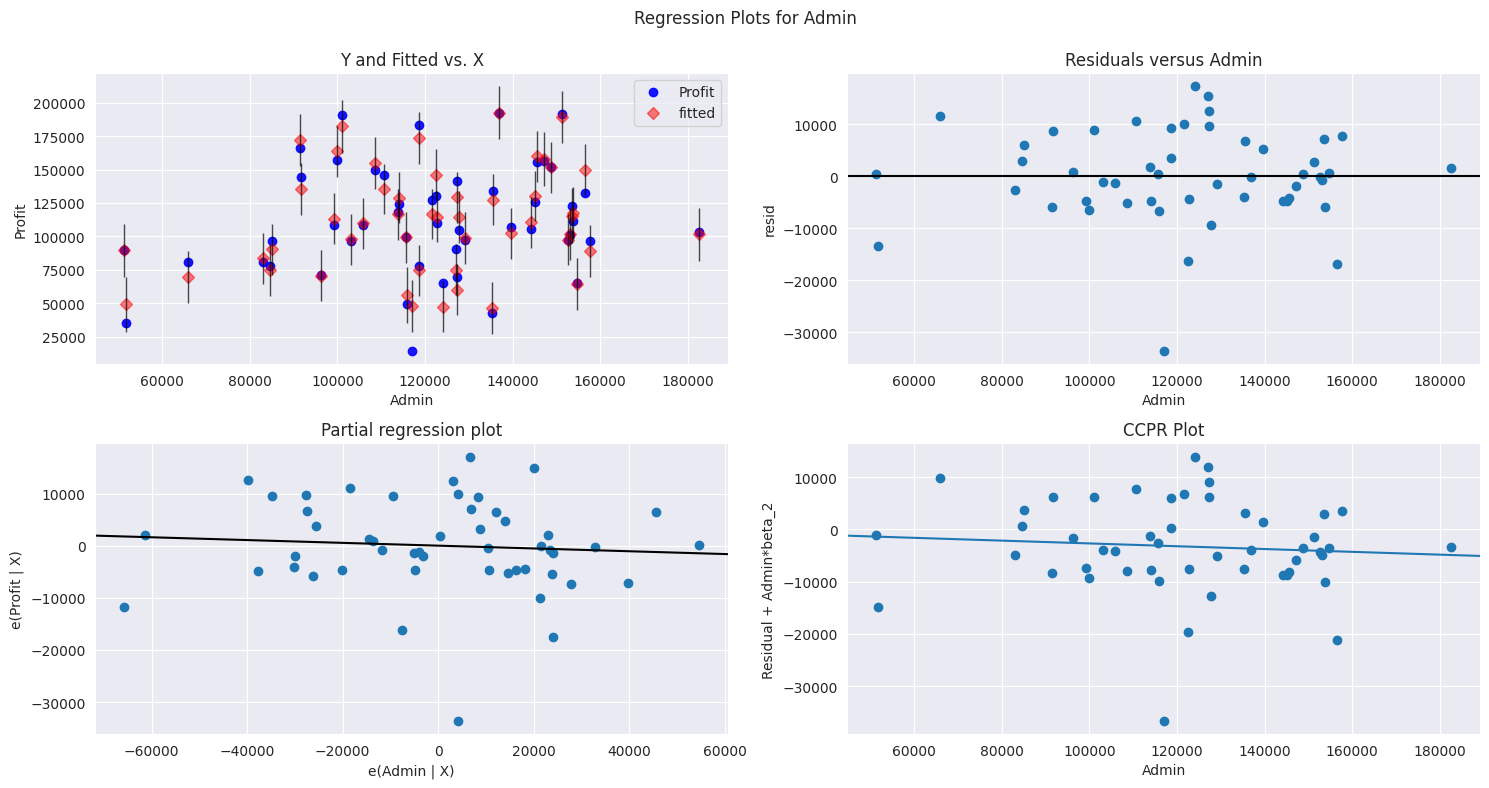

In [22]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Admin',fig=fig)
plt.show()

eval_env: 1


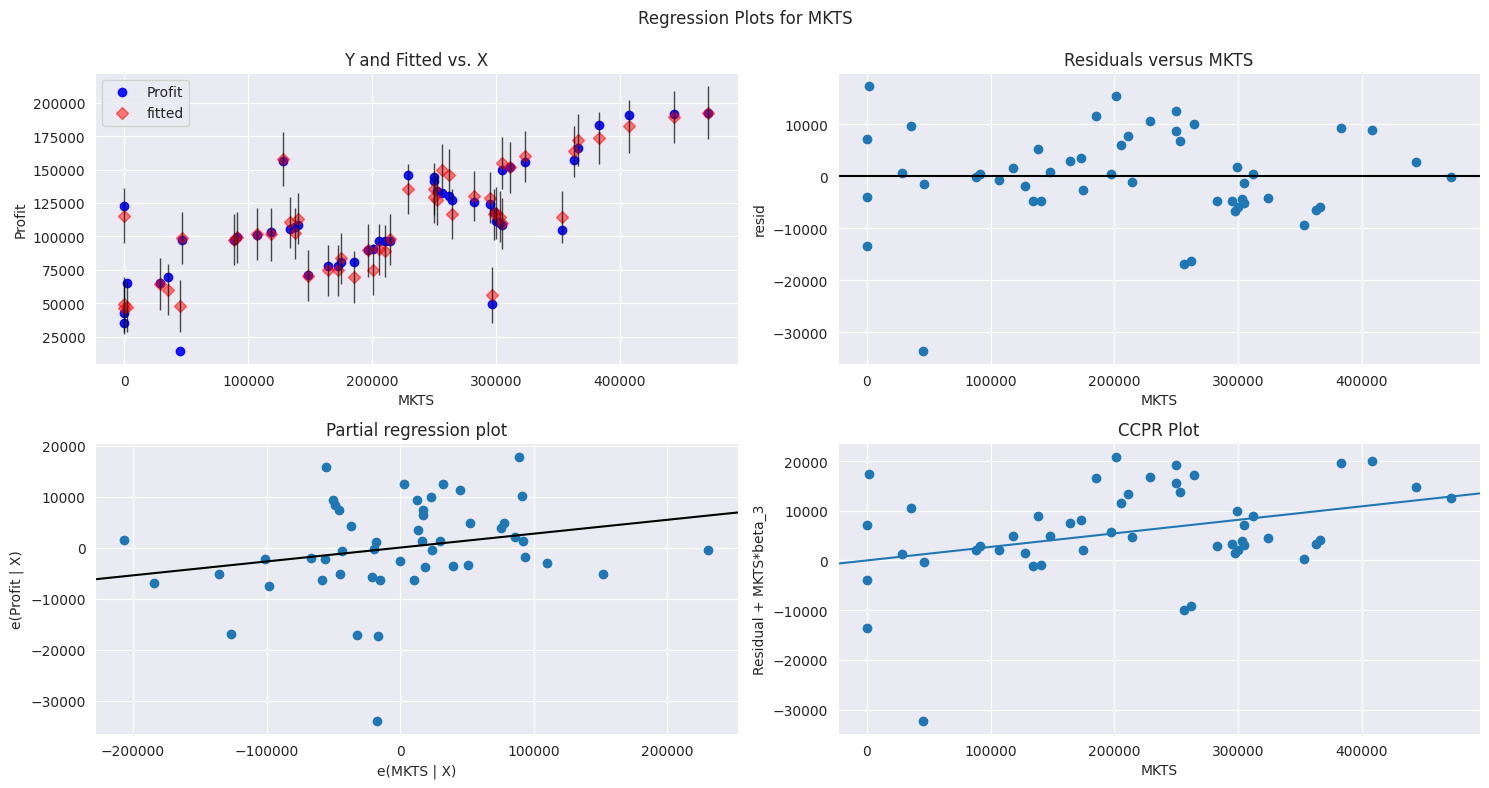

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

Model Deletion Diagnostics

1.Cooks Distance

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

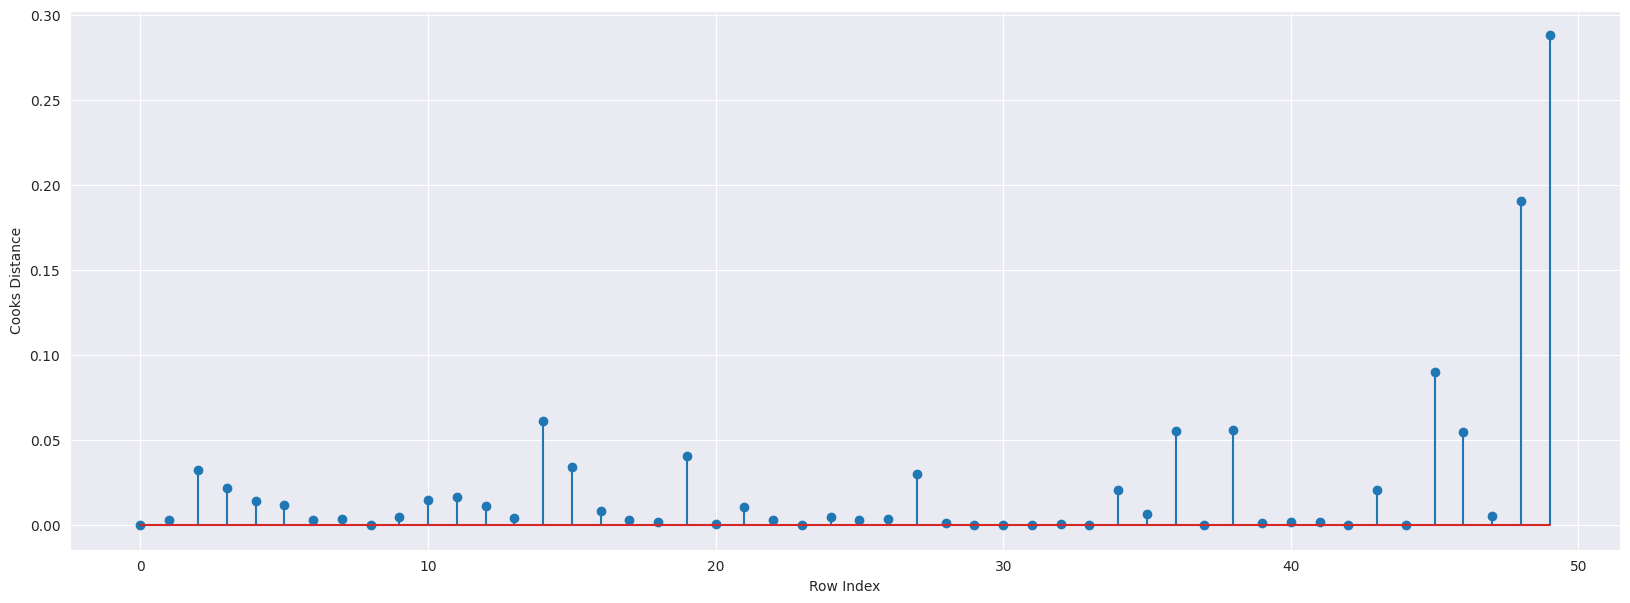

In [25]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

2.Leverage Value

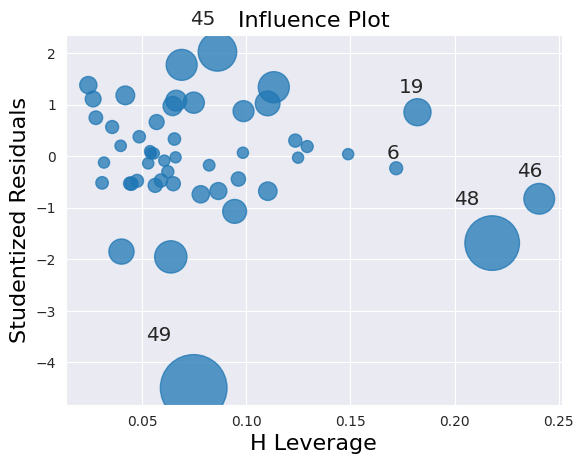

In [27]:
influence_plot(model)
plt.show()

In [28]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=startup.shape[1]
n=startup.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [29]:
startup[startup.index.isin([49])] 

,RDS,Admin,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


Improving The Model

In [30]:
df=startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
df

,RDS,Admin,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [31]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+Admin+MKTS",data=df).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=df.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RDS+Admin+MKTS",data=df).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [32]:
final_model.rsquared

0.9613162435129847

In [33]:
df

,RDS,Admin,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Model Prediction

In [34]:
new_data=pd.DataFrame({'RDS':90000,"Admin":10000,"MKTS":200000},index=[0])
new_data

,RDS,Admin,MKTS
0,90000,10000,200000


In [35]:
final_model.predict(new_data)

0    127677.318922
dtype: float64

In [36]:
pred_y=final_model.predict(df)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [37]:
d1={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d1)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
